<a href="https://colab.research.google.com/github/GabrielaRomoM/1st_PARCIAL_CE/blob/main/PIDController.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Parametros (Ejemplo)

In [ ]:
#Polo (a) y Ganancia (a) del sistema original
a = 3; b = 1
#Ganancia proporcional (Kp), Componente derivativa (Kd), Componente Integral (Ki)
Kp = 1 ; Kd = -0.5 ; Ki = 2 # Kd definida dentro del rango (-1/b, 0)

#Primera Simulación
Simule y compare la respuesta al escalón unitario del sistema original con el del sistema controlado.

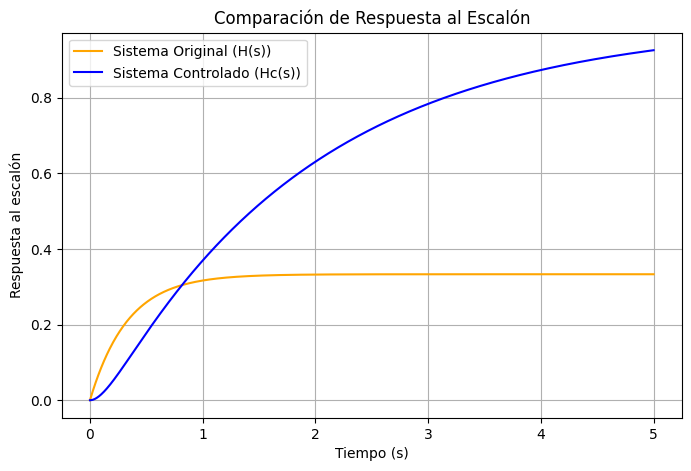

In [ ]:
# Sistema original de primer orden H(s) = b / (s + a)
num = [b] ; den = [1, a]
sysorig = signal.TransferFunction(num,den)

# Sistema en lazo cerrado con control (según ecuación característica)
numc = [(Ki * b) / (1 + Kd * b)] ; denc = [1, (a + Kp * b) / (1 + Kd * b), (Ki * b) / (1 + Kd * b)]
sysc = signal.TransferFunction(numc,denc)

# Simulación de la respuesta al escalón
t = np.linspace(0, 5, 1000)  # Tiempo de simulación
t1, yorig = signal.step(sysorig, T=t) ; t2, yc = signal.step(sysc, T=t)

# Visualización de las respuestas
plt.figure(figsize=(8, 5))
plt.plot(t1, yorig, label="Sistema Original (H(s))", color="orange")
plt.plot(t2, yc, label="Sistema Controlado (Hc(s))", color="blue")
plt.xlabel("Tiempo (s)"); plt.ylabel("Respuesta al escalón")
plt.title("Comparación de Respuesta al Escalón")
plt.legend(); plt.grid(); plt.show()

#Segunda Simulación
Simular la respuesta al escalón unitario u(t)

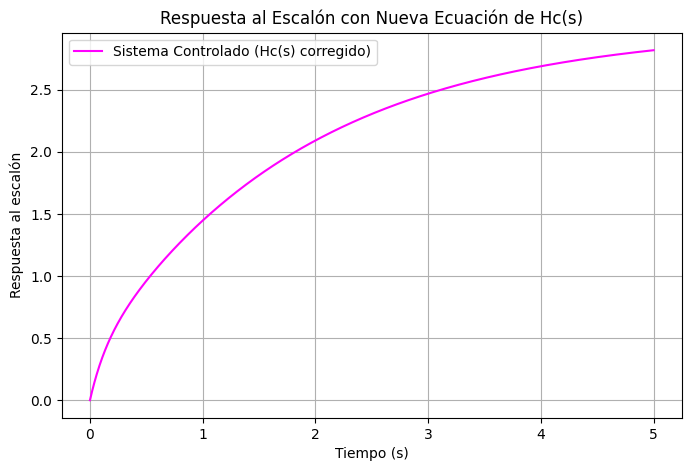

In [ ]:
# Nuevo numerador y denominador según la ecuación corregida
numnew = [(Ki / (1 + Kd * b)), (Ki * a) / (1 + Kd * b)]
dennew = [1, (a + Kp * b) / (1 + Kd * b), Ki / (1 + Kd * b)]

# Función de transferencia del sistema controlado
sysnew = signal.TransferFunction(numnew,dennew)

# Simulación de la respuesta al escalón unitario
tn, ynew = signal.step(sysnew, T=t)

# Visualización de la respuesta
plt.figure(figsize=(8, 5))
plt.plot(tn, ynew, label="Sistema Controlado (Hc(s) corregido)", color="magenta")
plt.xlabel("Tiempo (s)") ; plt.ylabel("Respuesta al escalón")
plt.title("Respuesta al Escalón con Nueva Ecuación de Hc(s)")
plt.legend(); plt.grid(); plt.show()